**Project Description**\
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**Data Description**

  **Item_Identifier**: Unique identifier for each item.\
  **Item_Weight**: Weight of the item.\
  **Item_Fat_Content**: Categorization of the item's fat content (e.g., "Low Fat," "Regular").\
  **Item_Visibility**: Percentage of total display area in the store allocated to the particular item.\
  **Item_Type**: Category of the item (e.g., "Dairy," "Soft Drinks," "Meat," "Fruits and Vegetables," "Household").\
  **Item_MRP**: Maximum Retail Price (MRP) of the item.\
  **Outlet_Identifier**: Unique identifier for each outlet.
  **Outlet_Establishment_Year**: Year in which the outlet was established.\
  **Outlet_Size**: Size of the outlet (e.g., "Medium," "High"). Some entries are missing (NaN).\
  **Outlet_Location_Type**: Location type of the outlet (e.g., "Tier 1," "Tier 3").\
  **Outlet_Type**: Type of outlet (e.g., "Supermarket Type1," "Grocery Store," "Supermarket Type2").\
  **Item_Outlet_Sale**s: Sales of the item in the particular outlet (target variable).

**Hypothesis Generation**\
Store Size Hypothesis:

    Larger stores may have higher sales due to a larger customer base and more product variety.

Location Impact Hypothesis:

    Stores in certain cities or regions may experience higher sales due to factors like population density or economic conditions.

**Loading Packages and Data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [ ]:
!ls

gdrive	sample_data


In [ ]:
import sys, os
import numpy as np
import pandas as pd

In [ ]:
new_directory_path = '/content/gdrive/My Drive/Python Projects/BigMart Predictive Model'

os.chdir(new_directory_path)

In [ ]:
df=pd.read_csv("/content/gdrive/My Drive/Python Projects/BigMart Predictive Model/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# read the test data
df_test=pd.read_csv("/content/gdrive/My Drive/Python Projects/BigMart Predictive Model/Test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
df_test.shape

(5681, 11)

In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# impute the Item_Weight with the mean value and Outlet_Size with the mode
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
mode_value = df['Outlet_Size'].mode().iloc[0]
df['Outlet_Size'].fillna(mode_value, inplace=True)

In [ ]:
# Check for the missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
unique_outlet_count = df['Outlet_Identifier'].nunique()
unique_outlet_count

10

In [ ]:
df['Outlet_Size'].nunique()

3

In [ ]:
# Check for duplicates
duplicates=df.duplicated().sum()
duplicates

0

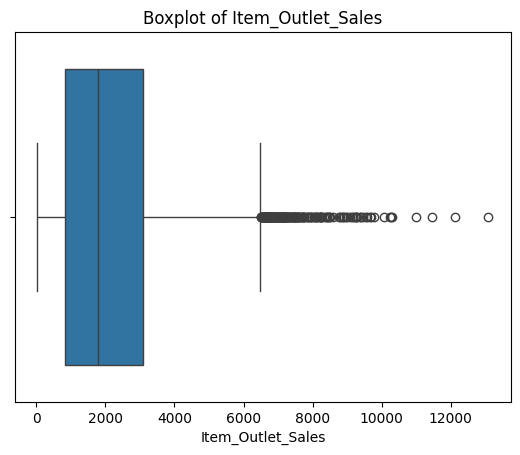

In [ ]:
# Handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for Item_Outlet_Sales
sns.boxplot(x='Item_Outlet_Sales', data=df)
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()


In [ ]:
# Define a function to remove the outliers
def remove_outliers(df, column, threshold=1.5):

    # Calculate the IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers


df_no_outliers = remove_outliers(df, 'Item_Outlet_Sales')

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (8523, 12)
Shape after removing outliers: (8337, 12)


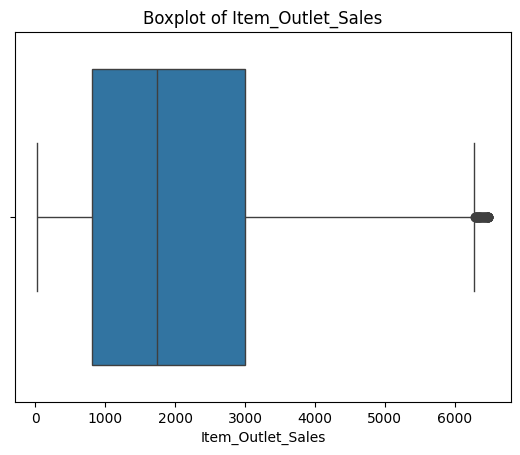

In [ ]:
# Recheck again
sns.boxplot(x='Item_Outlet_Sales', data=df_no_outliers)
plt.title('Boxplot of Item_Outlet_Sales')
plt.show()

**Outlet_Establishment_Year**

In [ ]:
import datetime as dt

In [ ]:
current_year = dt.datetime.today().year
current_year

2024

In [ ]:
df_no_outliers['Outlet_age']= current_year - df_no_outliers['Outlet_Establishment_Year']

<ipython-input-43-3ea617448e61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Outlet_age']= current_year - df_no_outliers['Outlet_Establishment_Year']


In [ ]:
df_no_outliers.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,25


In [ ]:
df_no_outliers = df_no_outliers.drop('Outlet_Establishment_Year',axis=1)

In [ ]:
df_no_outliers.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,25


In [ ]:
# Create a copy of dataframe
df2=df_no_outliers.copy()
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,37


**Univariate Analysis**

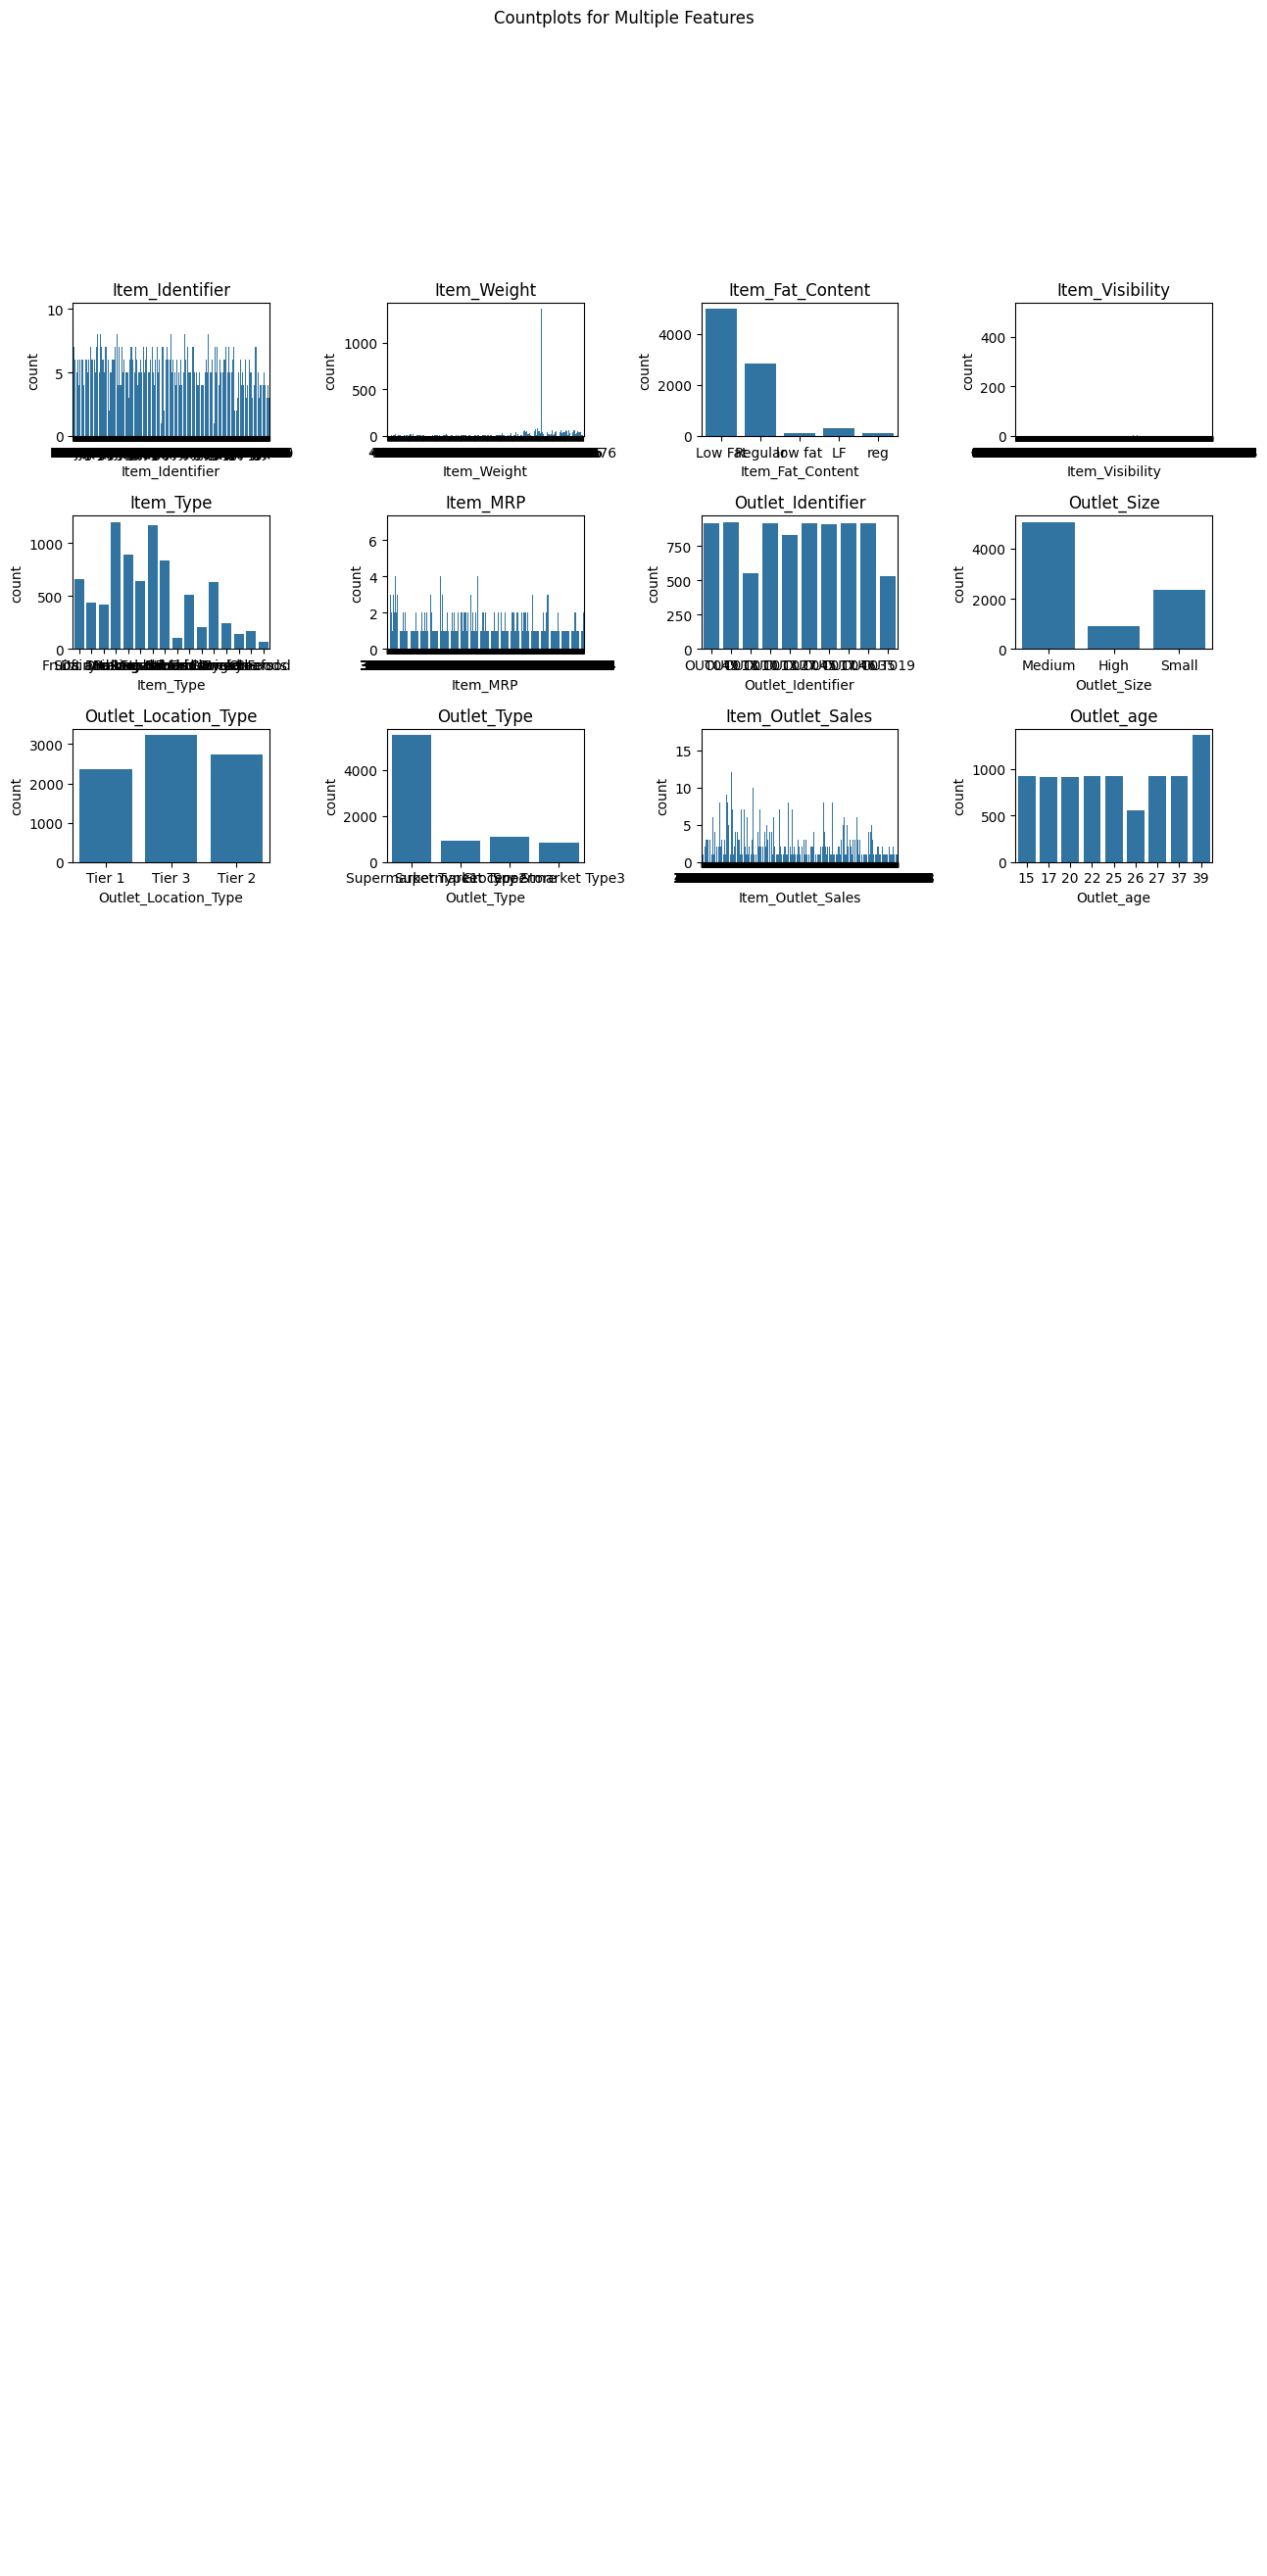

In [ ]:
import seaborn as sns

# Create the figure and subplots
fig, axs = plt.subplots(11, 4, figsize=(15, 30))

# Flatten the axs array to make it easier to iterate through
axs = axs.flatten()

# Loop through each feature and plot a countplot in a separate subplot
for i, col in enumerate(df2.columns):
    sns.countplot(x=col, data=df2, ax=axs[i])
    axs[i].set_title(col)

# Hide any unused subplots
for i in range(len(df2.columns), 11 * 4):
    axs[i].axis('off')

# Add a main title and adjust the spacing between subplots
plt.suptitle('Countplots for Multiple Features')
plt.subplots_adjust(hspace=0.6, wspace=0.6)

# Show the plot
plt.show()


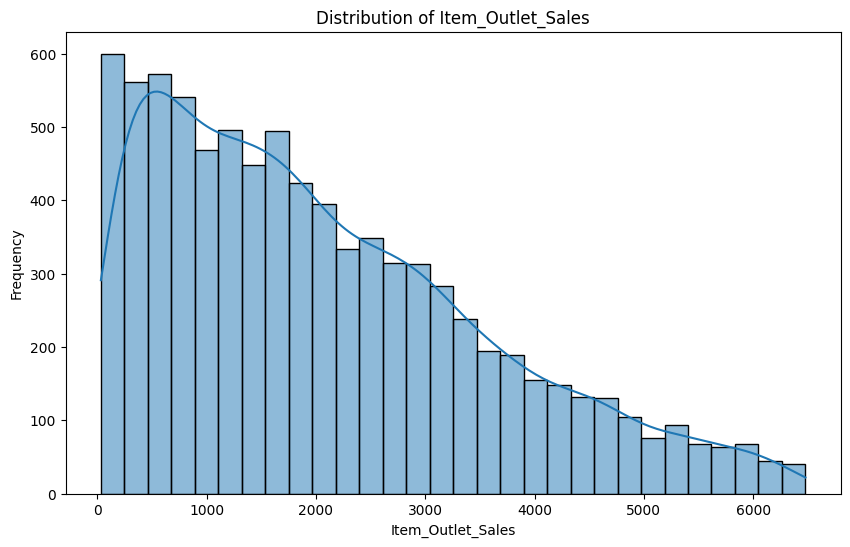

In [ ]:
# Histogram: Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df2['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


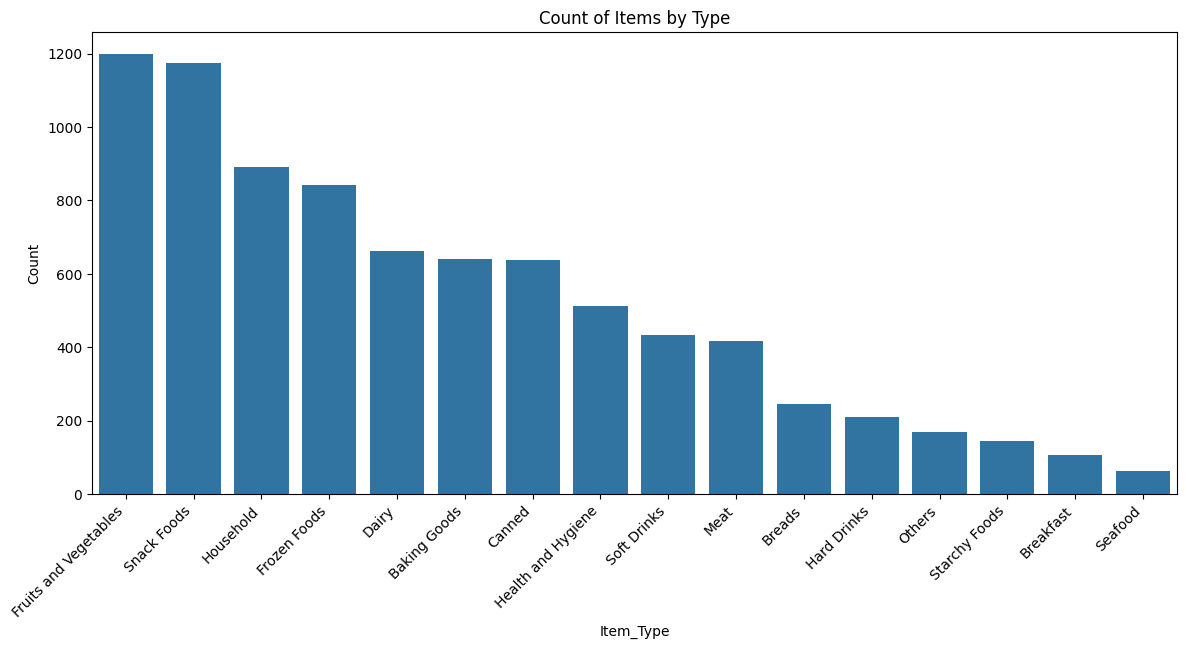

In [ ]:
# Countplot: Item_Type
plt.figure(figsize=(14, 6))
sns.countplot(x='Item_Type', data=df2, order=df2['Item_Type'].value_counts().index)
plt.title('Count of Items by Type')
plt.xlabel('Item_Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


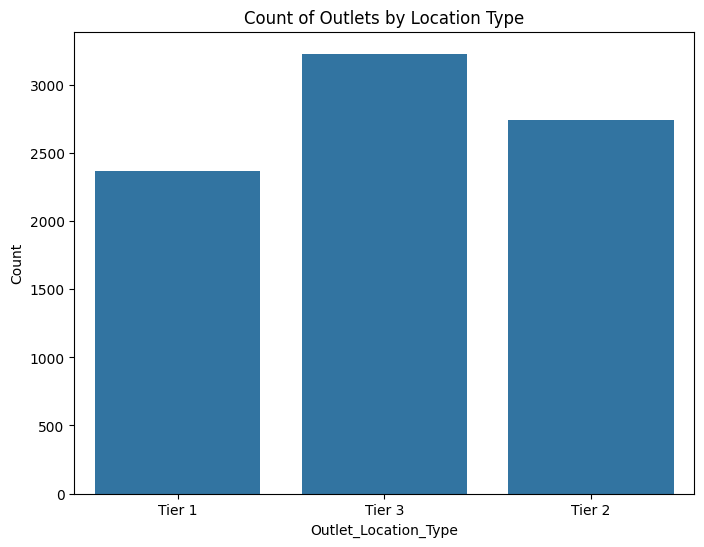

In [ ]:
# Countplot: Outlet_Location_Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Outlet_Location_Type', data=df2)
plt.title('Count of Outlets by Location Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Count')
plt.show()



**Bivariate Analysis**

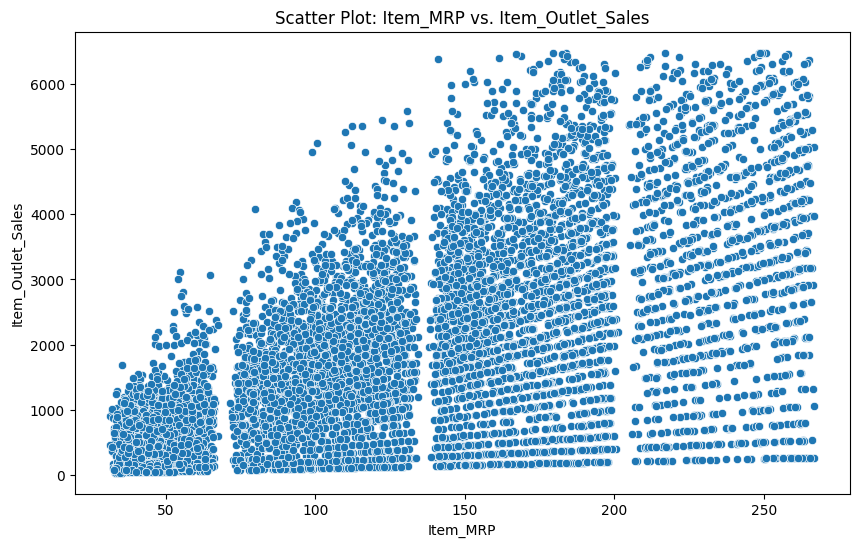

In [ ]:
# Scatter plot: Item_MRP vs. Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df2)
plt.title('Scatter Plot: Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()


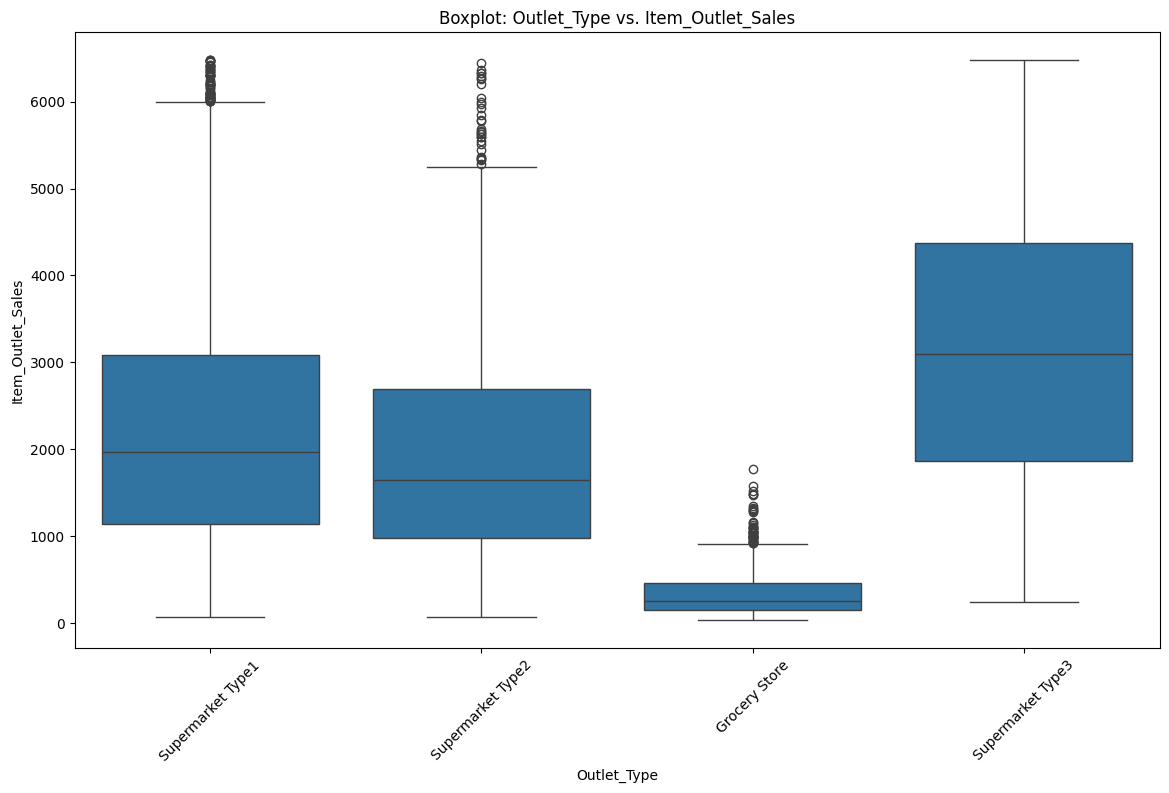

In [ ]:
# Boxplot: Outlet_Type vs. Item_Outlet_Sales
plt.figure(figsize=(14, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df2)
plt.title('Boxplot: Outlet_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()


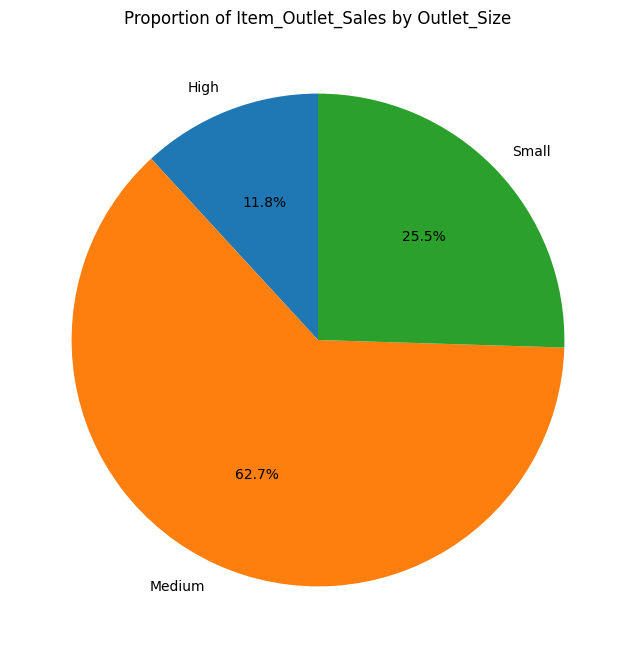

In [ ]:
# Group by Outlet_Size and calculate the total sales for each size
sales_by_size = df2.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Item_Outlet_Sales by Outlet_Size')
plt.show()


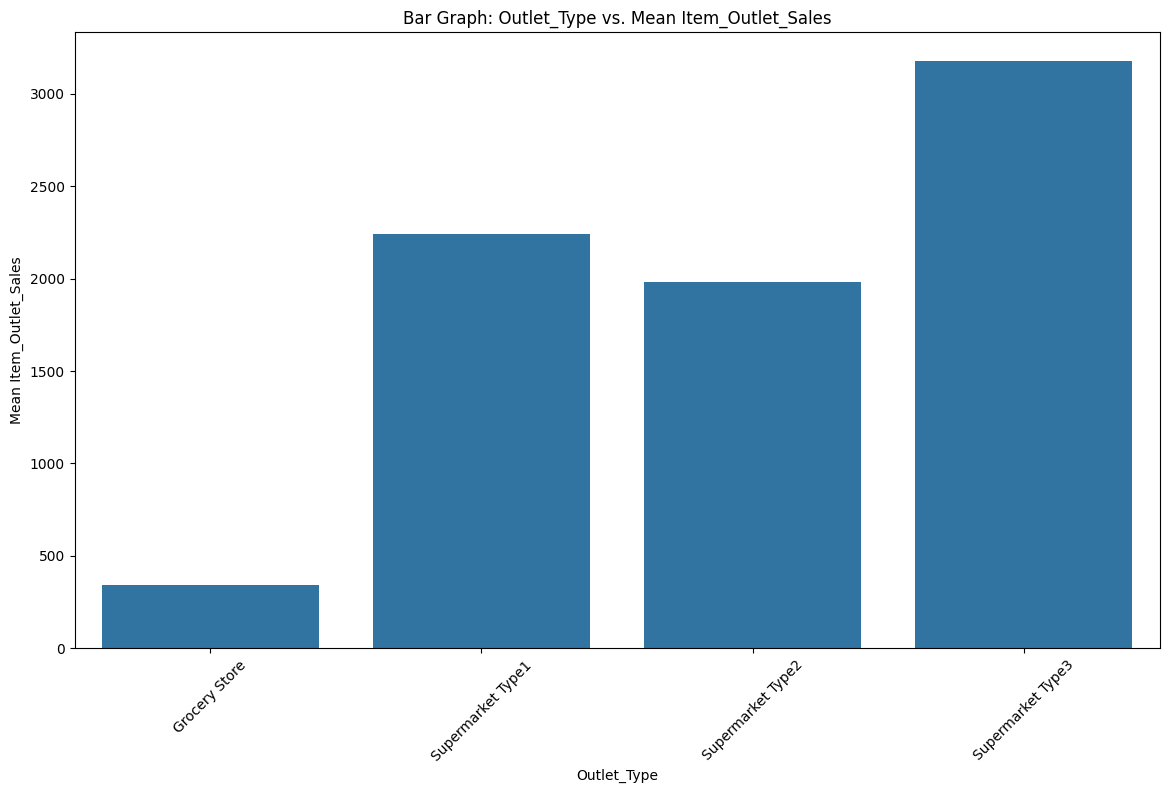

In [ ]:
# Calculate the mean or total sales for each outlet type
sales_by_outlet_type = df2.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()

# Plot a bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x=sales_by_outlet_type.index, y=sales_by_outlet_type.values)
plt.title('Bar Graph: Outlet_Type vs. Mean Item_Outlet_Sales')
plt.xlabel('Outlet_Type')
plt.ylabel('Mean Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.show()


<ipython-input-56-be664018f285>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


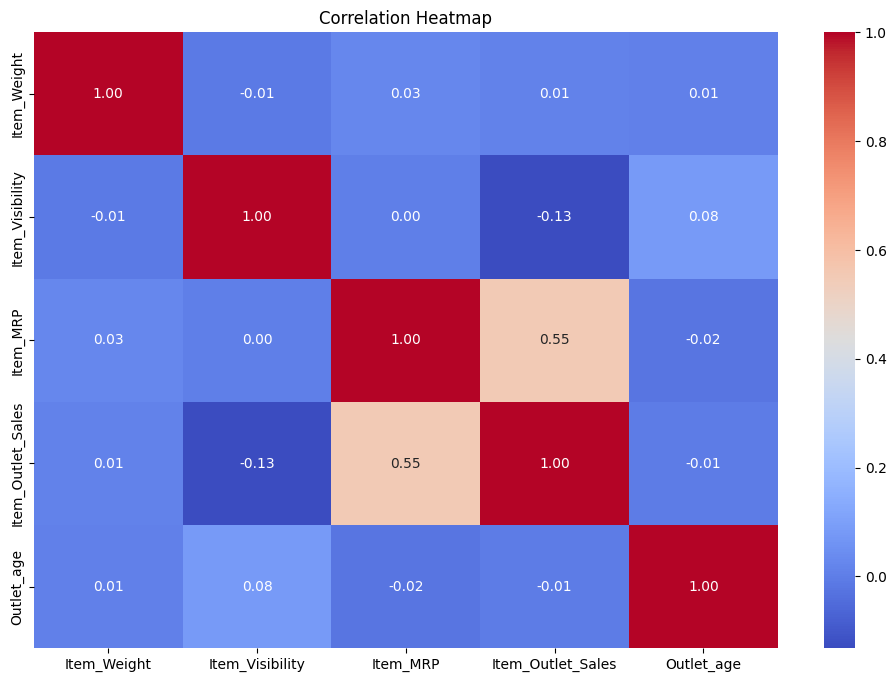

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Variables are not correlated with each other except for Item Mpr and Item Outlet sales with 0.55 correlation

**Data Preprocessing**

In [ ]:
df2['Item_Fat_Content'].value_counts()

Low Fat    4971
Regular    2827
LF          313
reg         116
low fat     110
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Merge Low Fat, LF, low fat as one item
df2.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5394
Regular    2943
Name: Item_Fat_Content, dtype: int64

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df2['Item_Identifier'] = encoder.fit_transform(df2['Item_Identifier'])

df2['Item_Fat_Content'] = encoder.fit_transform(df2['Item_Fat_Content'])

df2['Item_Type'] = encoder.fit_transform(df2['Item_Type'])

df2['Outlet_Identifier'] = encoder.fit_transform(df2['Outlet_Identifier'])

df2['Outlet_Size'] = encoder.fit_transform(df2['Outlet_Size'])

df2['Outlet_Location_Type'] = encoder.fit_transform(df2['Outlet_Location_Type'])

df2['Outlet_Type'] = encoder.fit_transform(df2['Outlet_Type'])

In [ ]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,25
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,15
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,25
3,1121,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,26
4,1297,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,37


**Feature Selection**

In [ ]:
X = df2.drop(columns='Item_Outlet_Sales', axis=1)
y = df2['Item_Outlet_Sales']

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5360124180653694


**XGBRFRegressor**

In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5852334138993013


**XGBRFRegressor Feature importances**

In [ ]:
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
9,Outlet_Type,0.492092
6,Outlet_Identifier,0.195968
5,Item_MRP,0.184057
10,Outlet_age,0.092968
8,Outlet_Location_Type,0.023629
3,Item_Visibility,0.002962
0,Item_Identifier,0.002503
1,Item_Weight,0.001937
4,Item_Type,0.001774
2,Item_Fat_Content,0.001703


In [ ]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility','Item_Identifier',
'Item_Weight','Item_Type','Item_Fat_Content','Outlet_Location_Type'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.586666366946998


In [ ]:
final_data = X.drop(columns=['Item_Visibility','Item_Identifier',
'Item_Weight','Item_Type','Item_Fat_Content','Outlet_Location_Type'],axis=1)

In [ ]:
final_data.head()

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9,1,1,25
1,48.2692,3,1,2,15
2,141.6180,9,1,1,25
3,182.0950,0,1,0,26
4,53.8614,1,0,1,37


**Build the Model**

In [ ]:
#X = df2.drop(columns='Item_Outlet_Sales', axis=1)
#y = df2['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data,y,test_size=0.2,random_state=10)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(8337, 11) (6669, 5) (1668, 5)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
print(f'Linear Regression - Mean Squared Error: {linear_reg_mse}')


Linear Regression - Mean Squared Error: 1170048.2603382636


In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost - Mean Squared Error: {xgb_mse}')


XGBoost - Mean Squared Error: 1100403.7008415211


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest - Mean Squared Error: {rf_mse}')


Random Forest - Mean Squared Error: 1205466.547753595


In [ ]:
# Create a DataFrame to store the results
model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'XGBoost', 'Random Forest'],
    'Mean Squared Error': [linear_reg_mse, xgb_mse, rf_mse]
})

# Display the results
print(model_results)


               Model  Mean Squared Error
0  Linear Regression        1.170048e+06
1            XGBoost        1.100404e+06
2      Random Forest        1.205467e+06


XGBoost is the best among the 3 models

**R-squared Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Calculate the R-squared on the test set
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print(f'Linear Regression - R-squared: {linear_reg_r2}')


Linear Regression - R-squared: 0.47880911685649574


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000,random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Calculate the R-squared on the test set
rf_r2 = rf_model.score(X_test, y_test)

print(f'Random Forest - R-squared: {rf_r2}')


Random Forest - R-squared: 0.46312831763738216


In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Calculate the R-squared on the test set
xgb_r2 = xgb_model.score(X_test, y_test)

print(f'XGBoost - R-squared: {xgb_r2}')


XGBoost - R-squared: 0.5098318624138061


**Test the Model**

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = xgb_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

754.5427665539054

In [ ]:
pred = xgb_model.predict(np.array([[249.8092,9.0,1.0,1.0,25]]))[0]
print(pred)

4040.7234


In [ ]:
print(f"Sales Value is between {pred-754.54} and {pred+754.54}")

Sales Value is between 3286.183388671875 and 4795.263388671875


In [ ]:
pred = xgb_model.predict(np.array([[182.0950,0.0,1.0,0.0,26]]))[0]
print(pred)

736.53613


In [ ]:
print(f"Sales Value is between {pred-754.54} and {pred+754.54}")

Sales Value is between -18.003867187499964 and 1491.0761328125


In [ ]:
pred = xgb_model.predict(np.array([[53.8614,1.0,0.0,1.0,37]]))[0]
print(pred)

885.0632


**Saving the Model**

In [ ]:
import joblib

In [ ]:
joblib.dump(xgb_model,'bigmart_model')

['bigmart_model']